In [ ]:
# use: pip install sdswrapper

Pacotes python:

In [ ]:
# fix some imports here

import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 

from pykrige.rk import RegressionKriging
from pykrige.ok import OrdinaryKriging

from parameters import *
from wrapper import Wrapper
from ordinarykriginginterface import OrdinaryKrigingInterface
from sampler import SampleGenerator

Instanciando os modelos de interesse:

In [2]:
model_list = [
    ('LinearRegression', LinearRegression()),
    ('RidgeRegression', Ridge()),
    ('LassoRegression', Lasso()),
    ('ElasticNetRegression', ElasticNet()),
    ('DecisionTreeRegression', DecisionTreeRegressor()),
    ('RandomForestRegression', RandomForestRegressor()),
    ('GradientBoostingRegression', GradientBoostingRegressor()),
    ('SupportVectorRegression', SVR()),
    ('KNearestNeighborsRegression', KNeighborsRegressor())
]

In [3]:
krige_models = list()

for model_name, model in model_list:

    if model_name == 'DecisionTreeRegression':

        continue

    krige_models.append(
        (
            'KrigingRegressionRF' + model_name,
            RegressionKriging(
                regression_model    = model,
                variogram_model     = 'linear',
                verbose             = False,
                nlags               = 10
            )
        )
    )

In [4]:
ordinary_kriging = OrdinaryKrigingInterface()


model_list.append(
    ('OrdinaryKriging', ordinary_kriging)
)

In [5]:
model_list.extend(krige_models)

In [6]:
model_list

[('LinearRegression', LinearRegression()),
 ('RidgeRegression', Ridge()),
 ('LassoRegression', Lasso()),
 ('ElasticNetRegression', ElasticNet()),
 ('DecisionTreeRegression', DecisionTreeRegressor()),
 ('RandomForestRegression', RandomForestRegressor()),
 ('GradientBoostingRegression', GradientBoostingRegressor()),
 ('SupportVectorRegression', SVR()),
 ('KNearestNeighborsRegression', KNeighborsRegressor()),
 ('OrdinaryKriging', OrdinaryKrigingInterface()),
 ('KrigingRegressionRFLinearRegression',
  <pykrige.rk.RegressionKriging at 0x104605450>),
 ('KrigingRegressionRFRidgeRegression',
  <pykrige.rk.RegressionKriging at 0x147bbcb90>),
 ('KrigingRegressionRFLassoRegression',
  <pykrige.rk.RegressionKriging at 0x147c00e50>),
 ('KrigingRegressionRFElasticNetRegression',
  <pykrige.rk.RegressionKriging at 0x147e24490>),
 ('KrigingRegressionRFRandomForestRegression',
  <pykrige.rk.RegressionKriging at 0x147bc5850>),
 ('KrigingRegressionRFGradientBoostingRegression',
  <pykrige.rk.RegressionKr

Dataset para testes:

In [7]:
sg = SampleGenerator(
            y_filepath                      = ABUNDANCE_FILEPATH,
            p_1_filepath                    = P_1,
            p_2_filepath                    = P_2,
            georreferenced_raster_filepath  = SUITABILITY_FILEPATH
        )

In [8]:
df_y = sg.sample(10)

df_pseudoabsences = sg.sample(10, pseudoabsences=True)

dataset = pd.concat([df_y, df_pseudoabsences], axis=0)

In [9]:
dataset

,ID,coordenada_X,coordenada_Y,y,p_1,p_2
0,0.0,109.0,169.0,448.0,25.374166,5898.0
1,1.0,176.0,88.0,132.0,27.935167,1729.0
2,2.0,147.0,312.0,808.0,25.365499,3024.0
3,3.0,386.0,277.0,550.0,24.891167,2650.0
4,4.0,172.0,246.0,519.0,25.351833,2064.0
5,5.0,299.0,275.0,657.0,25.757334,3285.0
6,6.0,396.0,275.0,370.0,24.674999,2660.0
7,7.0,125.0,280.0,331.0,19.276667,2925.0
8,8.0,251.0,249.0,475.0,26.391666,2685.0
9,9.0,319.0,293.0,585.0,25.892166,3507.0


Wrapper:

In [10]:
sds_wrapper = Wrapper(
    model_list              = model_list,
    dataset                 = dataset,
    X_column_names          = ['coordenada_X', 'coordenada_Y'],
    P_column_names          = ['p_1', 'p_2'],
    y_column_name           = 'y',
    projections_folder      = PROJECTIONS_FOLDER,
    k                       = 5,
    gridsearch_parameters   = None
)

In [11]:
output = sds_wrapper.fit()

Inspecionando resultados dos modelos:

In [12]:
df_output = pd.DataFrame(output).sort_values(by='model_metrics_mean', ascending=True)

In [13]:
df_output

,sample_size,name,model_type,model_metrics_mean,model_metrics_std,trained_model
16,20,KrigingRegressionRFSupportVectorRegression,KR,120.637403,93.356721,<pykrige.rk.RegressionKriging object at 0x147e...
17,20,KrigingRegressionRFKNearestNeighborsRegression,KR,124.717968,95.645256,<pykrige.rk.RegressionKriging object at 0x147e...
9,20,OrdinaryKriging,KR,126.384603,77.416574,OrdinaryKrigingInterface()
15,20,KrigingRegressionRFGradientBoostingRegression,KR,128.272492,108.637605,<pykrige.rk.RegressionKriging object at 0x147e...
14,20,KrigingRegressionRFRandomForestRegression,KR,142.002126,108.559446,<pykrige.rk.RegressionKriging object at 0x147b...
5,20,RandomForestRegression,SK,142.408024,110.811895,"(DecisionTreeRegressor(max_features=1.0, rando..."
6,20,GradientBoostingRegression,SK,143.170989,126.021591,([DecisionTreeRegressor(criterion='friedman_ms...
4,20,DecisionTreeRegression,SK,143.615079,134.237385,DecisionTreeRegressor()
8,20,KNearestNeighborsRegression,SK,190.351884,162.338588,KNeighborsRegressor()
3,20,ElasticNetRegression,SK,247.337870,143.530595,ElasticNet()


Projetando para a América do Sul e computando a qualidade das projecções:

In [14]:
df_full_data = sg.get_full_data()

In [15]:
df_full_data

,coordenada_X,coordenada_Y,y,p_1,p_2
0,0,0,0.0,-3.400000e+38,-3.400000e+38
1,1,0,0.0,-3.400000e+38,-3.400000e+38
2,2,0,0.0,-3.400000e+38,-3.400000e+38
3,3,0,0.0,-3.400000e+38,-3.400000e+38
4,4,0,0.0,-3.400000e+38,-3.400000e+38
...,...,...,...,...,...
1920298,1136,1682,0.0,-3.400000e+38,-3.400000e+38
1920299,1137,1682,0.0,-3.400000e+38,-3.400000e+38
1920300,1138,1682,0.0,-3.400000e+38,-3.400000e+38
1920301,1139,1682,0.0,-3.400000e+38,-3.400000e+38


In [17]:
model_id = 6

print('Model:', output[model_id]['name'])

prediction = sds_wrapper.predict(
    trained_model = output[model_id]['trained_model'],
    X = df_full_data[['coordenada_X', 'coordenada_Y']],
    p = df_full_data[['p_1', 'p_2']],
    shape = sg.y.shape
)

Model: GradientBoostingRegression


In [18]:
sds_wrapper.score(
    np.where(np.isnan(prediction), -1, prediction),
    np.where(np.isnan(sg.y), -1, sg.y),
)

162.37786582484947

In [19]:
prediction = np.where(np.isnan(sg.y), np.nan, prediction)

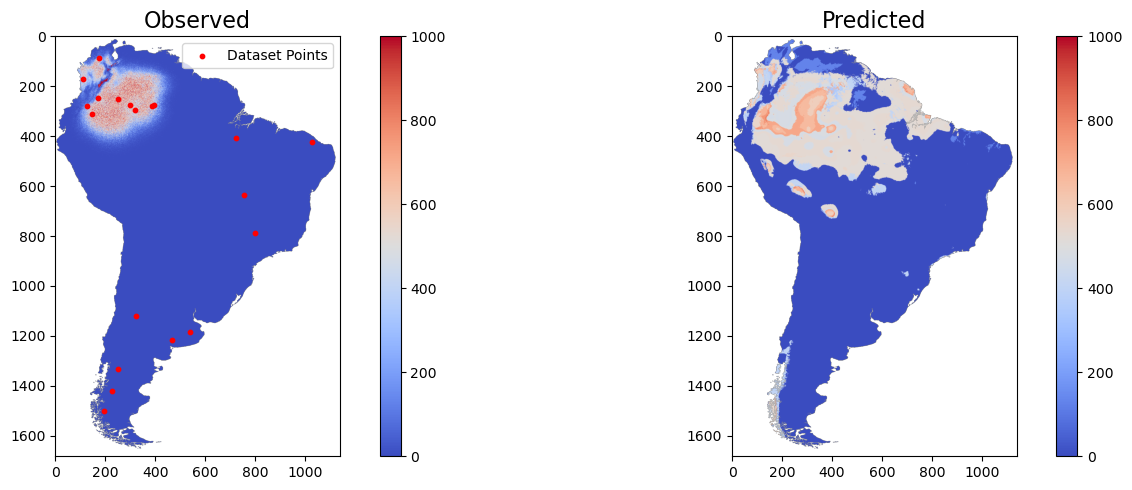

In [26]:
fig = plt.figure(figsize=(15, 5))

# Plotando o mapa observado
ax1 = plt.subplot(1, 2, 1)
plt.imshow(sg.y, cmap='coolwarm', vmin=0, vmax=1000)
plt.colorbar()
plt.title('Observed', fontsize=16)

# Adicionando os pontos do dataset
plt.scatter(dataset['coordenada_X'], dataset['coordenada_Y'], 
            c='red', s=10, label='Dataset Points')
plt.legend()

# Plotando o mapa previsto
ax2 = plt.subplot(1, 2, 2)
plt.imshow(prediction, origin='lower', cmap='coolwarm', vmin=0, vmax=1000)
plt.colorbar()
plt.gca().invert_yaxis()
plt.title('Predicted', fontsize=16)

plt.tight_layout()

Text(0.5, 1.0, 'Error in Predicted Y')

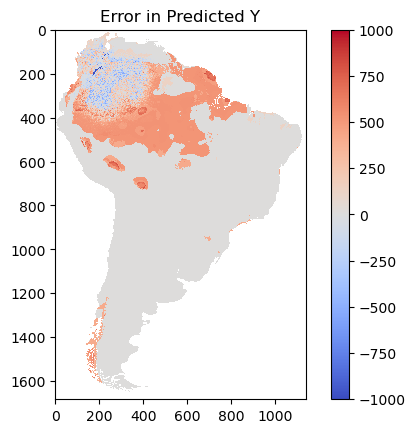

In [27]:
plt.imshow( (prediction - sg.y), cmap='coolwarm', interpolation='nearest', vmin=-1000, vmax=1000)
plt.colorbar()
plt.title('Error in Predicted Y')

Gráfico do Wrapper:

In [28]:
df_output['prediction']  = df_output['trained_model'].apply(lambda x: sds_wrapper.predict(
    trained_model = x,
    X = df_full_data[['coordenada_X', 'coordenada_Y']],
    p = df_full_data[['p_1', 'p_2']],
    shape = sg.y.shape
))

In [29]:
df_output['prediction']  = df_output['prediction'].apply(lambda x: sds_wrapper.mask(x, sg.y))

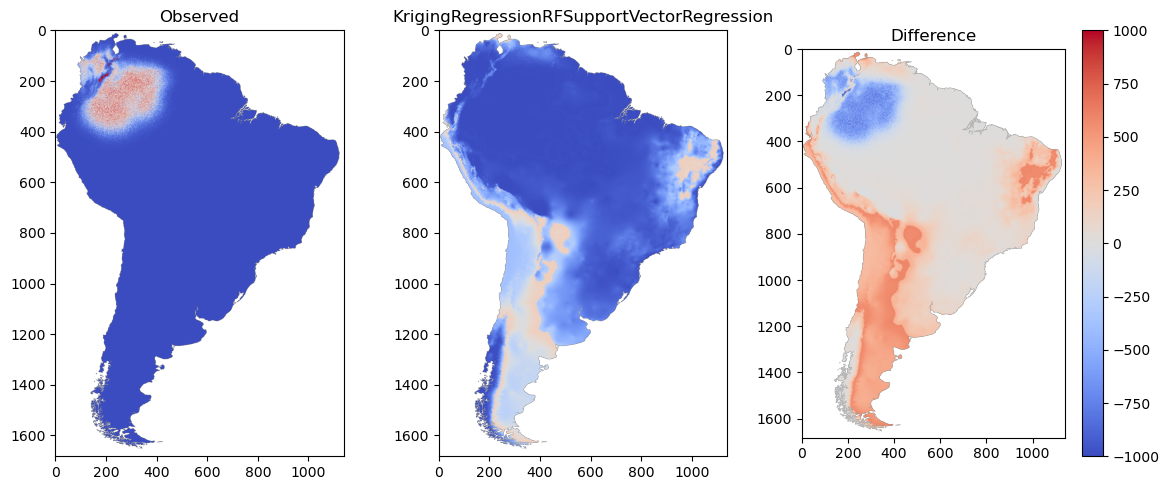

In [30]:
sds_wrapper.plot(df_output, reference_data = sg.y, best = True)

In [ ]:
# End #